In [14]:
# install.packages("tripack") 
# install.packages("rjson") 


The downloaded binary packages are in
	/var/folders/59/phgwmyk563s3dw33m2t84qkw0000gn/T//RtmpgbrCH8/downloaded_packages


In [2]:
library(rjson)
library(igraph)
library(data.table)
library(tripack)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘tripack’

The following objects are masked from ‘package:igraph’:

    convex.hull, triangles



In [38]:
json_data <- fromJSON(paste(readLines("san_francisco_censustracts.json"), collapse=""))
ver_attr <- data.frame(matrix(ncol = 5, nrow = 0))
x <- c("id", "name", "x_coor", "y_coor", "coor")
colnames(ver_attr) <- x
length(json_data$features)
for (i in (1:length(json_data$features))){
    coor_len <- length(json_data$features[[i]]$geometry$coordinates[[1]][[1]])
    latitude <- 0
    longitude <- 0
    for (j in (1:coor_len)){
        latitude <- latitude + json_data$features[[i]]$geometry$coordinates[[1]][[1]][[j]][1]
        longitude <- longitude + json_data$features[[i]]$geometry$coordinates[[1]][[1]][[j]][2]
    }
    x <- latitude / coor_len
    y <- longitude / coor_len
    id <- json_data$features[[i]]$properties$MOVEMENT_ID
    name <- json_data$features[[i]]$properties$DISPLAY_NAME
    ver_attr[nrow(ver_attr) + 1,] = list(id, name, x, y, list(c(x, y)))
}
nrow(ver_attr)
head(ver_attr)
print(ver_attr[1,]$y_coor)

Warning message in readLines("san_francisco_censustracts.json"):
“incomplete final line found on 'san_francisco_censustracts.json'”

[1] 2710

[1] 2710

id,name,x_coor,y_coor,coor
1,"Sargent Creek, San Ardo",-120.7887,36.07163,"-120.78868, 36.07163"
2,"400 Northumberland Avenue, Redwood Oaks, Redwood City",-122.2194,37.46958,"-122.21941, 37.46958"
3,"18300 Sutter Boulevard, Morgan Hill",-121.6602,37.15048,"-121.66022, 37.15048"
4,"2700 Stoughton Way, Sheffield, Sacramento",-121.3428,38.57307,"-121.34285, 38.57307"
5,"3200 Huntsman Drive, Rosemont Park, Sacramento",-121.3617,38.55443,"-121.36171, 38.55443"
6,"100 Carlsbad Circle, Vacaville",-121.9484,38.36665,"-121.94843, 38.36665"


[1] 36.07163


In [16]:
id_sf = 2607
id_sc = 1968
print(ver_attr[2607,])
print(ver_attr[1968,])

       id                       name   x_coor   y_coor
2607 2607 100 Campus Drive, Stanford -122.176 37.42969
       id                         name    x_coor   y_coor
1968 1968 700 Meder Street, Santa Cruz -122.0646 36.97417


In [17]:
ver_attr.triangles<-tri.mesh(ver_attr$x_coor, ver_attr$y_coor)

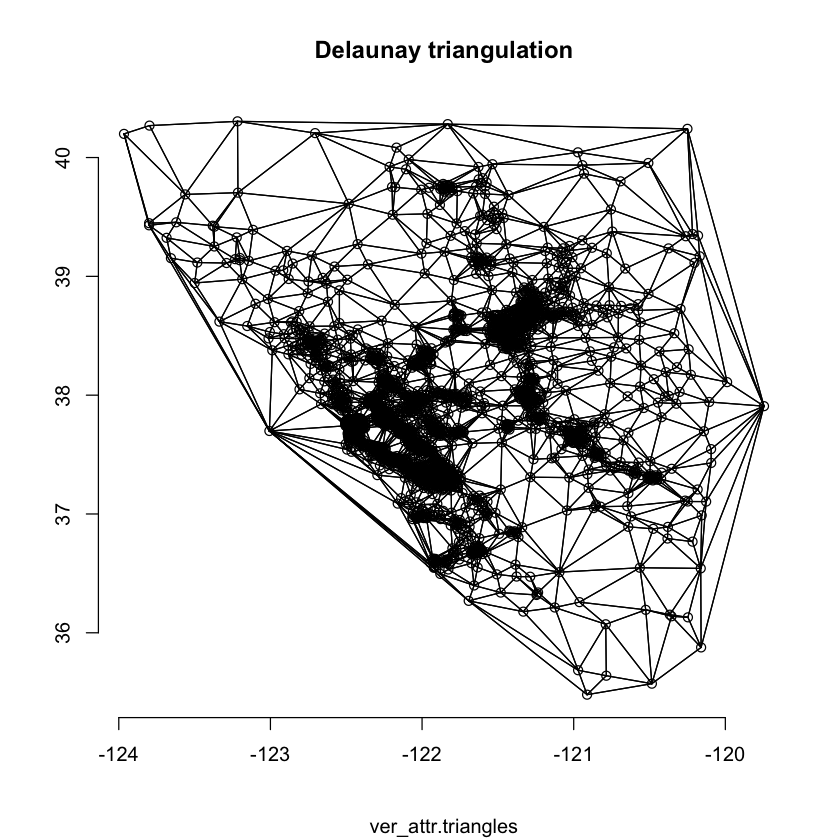

In [18]:
plot(ver_attr.triangles)
axis(1)
axis(2)

In [19]:
summary(ver_attr.triangles)

triangulation:
Call: tri.mesh(x = ver_attr$x_coor, y = ver_attr$y_coor) 
number of nodes: 2710 
number of arcs: 8115 
number of boundary nodes: 12 
number of triangles: 5406 
number of constraints: 0 

## Q12

In [20]:
neiblist <- neighbours(ver_attr.triangles)

2607 2607 100 Campus Drive, Stanford -122.176 37.42969
       id                         name    x_coor   y_coor
1968 1968 700 Meder Street, Santa Cruz -122.0646 36.97417

In [21]:
names(neiblist) <- ver_attr$id 

In [22]:
euc_dist <- as.matrix(dist(cbind(x=ver_attr.triangles$x, y=ver_attr.triangles$y)))

In [23]:
system.time(edge_list <- fread("san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv"))
nrow(edge_list)
edge_list <- edge_list[which(edge_list[,"month"]==12)]
nrow(edge_list)
head(edge_list)

edge_list <- edge_list[,c("sourceid","dstid","mean_travel_time"), drop = FALSE]
head(edge_list)
colnames(edge_list)[3] <- "weight"
head(edge_list)

   user  system elapsed 
  0.340   0.119   0.229 

[1] 1605957

[1] 538998

sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
1938,1952,12,596.69,327.27,530.23,1.60
1747,629,12,1454.81,536.38,1378.06,1.37
1872,1919,12,1227.01,391.90,1169.76,1.36
1871,1929,12,1005.54,308.34,965.06,1.32
81,2319,12,474.53,198.14,446.37,1.41
1873,1909,12,1164.51,461.02,1092.71,1.41


sourceid,dstid,mean_travel_time
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


sourceid,dstid,weight
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


In [24]:
graph <- graph.data.frame(edge_list, directed=F)
graph <- simplify(graph, remove.multiple = TRUE, remove.loops = TRUE,
  edge.attr.comb = list(weight="mean", "ignore"))
E(graph)
V(graph)
graph <- set.vertex.attribute(graph, name="location", value=list(c(0,0)))
graph <- set.vertex.attribute(graph, name="Display_name", value="b")

+ 311812/311812 edges from 76afc76 (vertex names):
 [1] 1938--1747 1938--1872 1938--1873 1938--232  1938--1891 1938--550 
 [7] 1938--1721 1938--176  1938--74   1938--1755 1938--1946 1938--1729
[13] 1938--722  1938--234  1938--251  1938--544  1938--1856 1938--338 
[19] 1938--175  1938--687  1938--818  1938--695  1938--682  1938--817 
[25] 1938--153  1938--272  1938--1455 1938--876  1938--131  1938--2147
[31] 1938--396  1938--2146 1938--2155 1938--52   1938--1269 1938--123 
[37] 1938--155  1938--235  1938--702  1938--1284 1938--1925 1938--2613
[43] 1938--1907 1938--1952 1938--1933 1938--957  1938--1906 1938--2513
[49] 1938--2515 1938--1870 1938--1928 1938--1923 1938--1597 1938--104 
[55] 1938--2488 1938--1893 1938--1875 1938--184  1938--65   1938--2169
+ ... omitted several edges

+ 1887/1887 vertices, named, from 76afc76:
   [1] 1938 1747 1872 1871 81   1873 232  1891 2423 650  680  542  604  660 
  [15] 1329 2421 1736 2021 550  1721 1700 176  536  74   288  169  99   1755
  [29] 646  2315 2322 2307 1390 641  1946 2357 1454 1729 2355 722  612  98  
  [43] 1074 1058 614  151  2341 1056 1745 1438 1473 1469 234  1098 1457 289 
  [57] 222  1059 1448 610  1097 1458 1484 315  1727 251  388  1748 544  1025
  [71] 1856 1726 1296 1749 338  1066 613  175  535  1451 2700 687  809  387 
  [85] 859  1739 1808 818  1838 738  695  685  682  817  627  339  605  153 
  [99] 609  647  645  272  284  1455 397  1409 876  1437 131  2210 347  1759
 [113] 2147 1359 2187 152  2113 396  2146 2155 2132 277  1258 369  52   2110
 [127] 1269 2157 1504 1456 1526 2111 123  1259 446  445  1514 1170 478  2401
+ ... omitted several vertices

In [25]:
time = distances(graph)

In [26]:
#id1, id2, dis, flow
el <- matrix(0, nrow = 0, ncol = 4)
for(x in c(1:length(neiblist))){
    for(y in c(1:length(neiblist[[x]]))){
        nb_id = neiblist[[x]][y]
        dis = euc_dist[x, nb_id]*69
        if(x %in% V(graph)$name && nb_id %in% V(graph)$name){
            t = time[which(V(graph)$name == x), which(V(graph)$name == nb_id)] 
            speed = dis/t
            flow = 2*(3600/((0.003+2*speed)/speed))
        }
        else{
            print(x)
            print(nb_id)
            flow = 0
        }   
        el <- rbind(el, c(x, nb_id, dis, flow))
    }
}

[1] 1
[1] 190
[1] 1
[1] 673
[1] 1
[1] 674
[1] 1
[1] 790
[1] 1
[1] 848
[1] 1
[1] 1428
[1] 4
[1] 5
[1] 4
[1] 1413
[1] 4
[1] 1415
[1] 4
[1] 1418
[1] 4
[1] 1419
[1] 4
[1] 1817
[1] 4
[1] 1818
[1] 5
[1] 4
[1] 5
[1] 258
[1] 5
[1] 1419
[1] 5
[1] 1420
[1] 10
[1] 375
[1] 10
[1] 579
[1] 10
[1] 2166
[1] 10
[1] 2690
[1] 12
[1] 494
[1] 13
[1] 70
[1] 13
[1] 654
[1] 13
[1] 655
[1] 13
[1] 966
[1] 13
[1] 1166
[1] 13
[1] 1179
[1] 15
[1] 1162
[1] 15
[1] 1163
[1] 15
[1] 1169
[1] 15
[1] 2017
[1] 15
[1] 2610
[1] 15
[1] 2684
[1] 18
[1] 340
[1] 18
[1] 1166
[1] 18
[1] 1179
[1] 18
[1] 1195
[1] 18
[1] 2278
[1] 18
[1] 2600
[1] 19
[1] 50
[1] 19
[1] 709
[1] 19
[1] 1812
[1] 19
[1] 1828
[1] 19
[1] 1859
[1] 19
[1] 2292
[1] 19
[1] 2609
[1] 19
[1] 2680
[1] 22
[1] 673
[1] 22
[1] 674
[1] 22
[1] 792
[1] 22
[1] 1428
[1] 29
[1] 989
[1] 29
[1] 994
[1] 29
[1] 1497
[1] 29
[1] 1506
[1] 32
[1] 33
[1] 32
[1] 407
[1] 32
[1] 1797
[1] 32
[1] 1798
[1] 32
[1] 2445
[1] 33
[1] 32
[1] 33
[1] 213
[1] 33
[1] 343
[1] 33
[1] 1362
[1] 33
[1] 17

In [27]:
el[,1]=as.character(el[,1]) #Because the vertex IDs in this dataset are numbers, we make sure igraph knows these should be treated as characters. Otherwise, it'll create problems (see page on data import)
el[,2]=as.character(el[,2])
el=as.matrix(el) #igraph needs the edgelist to be in matrix format
g=graph.edgelist(el[,1:2]) #We first greate a network from the first two columns, which has the list of vertices
E(g)$weight=as.numeric(el[,3]) #We then add the edge weights to this network by assigning an edge attribute called 'weight'.
E(g)$capacity=as.numeric(el[,4])

In [28]:
vcount(g)
ecount(g)

[1] 2710

[1] 16230

## Q13

In [29]:
max_flow(g, source=V(g)[which(V(g)$name == id_sf)], V(g)[which(V(g)$name == id_sc)])

$value
[1] 15014.96

$flow
    [1] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
    [6] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [11] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [16] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [26] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [31] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [36] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [41] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [46] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [51] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [56] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [61] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [66] 0.000000e+00 0.0

In [30]:
max_flow(g, source=V(g)[8], V(g)[52])

$value
[1] 14452.36

$flow
    [1] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
    [6] 0.000000e+00 1.018645e+03 2.549829e+03 2.649116e+03 2.572701e+03
   [11] 2.879761e+03 2.782312e+03 0.000000e+00 0.000000e+00 0.000000e+00
   [16] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [26] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [31] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [36] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [41] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [46] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [51] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [56] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [61] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [66] 0.000000e+00 0.0

In [31]:
edge_disjoint_paths(g, which(V(g)$name == id_sf), which(V(g)$name == id_sc))

[1] 5

In [124]:
distances(graph, v = sf, to = sc)

,1968
2607,3341.555


In [ ]:
# a = all_simple_paths(g, which(V(g)$name == id_sf, which(V(g)$name == id_sc)))

In [3]:
gg <- make_ring(10)
a = all_simple_paths(gg, 1, 5)

In [40]:
degree(g)[which(V(g)$name == id_sf)]

2607 
  12

In [41]:
degree(g)[which(V(g)$name == id_sc)]

1968 
  10

In [256]:
matrix(, nrow = 15, ncol = 0)

+ 1/10 vertex, from db37af0:
[1] 2

In [243]:
ig = induced_subgraph(gg, a)

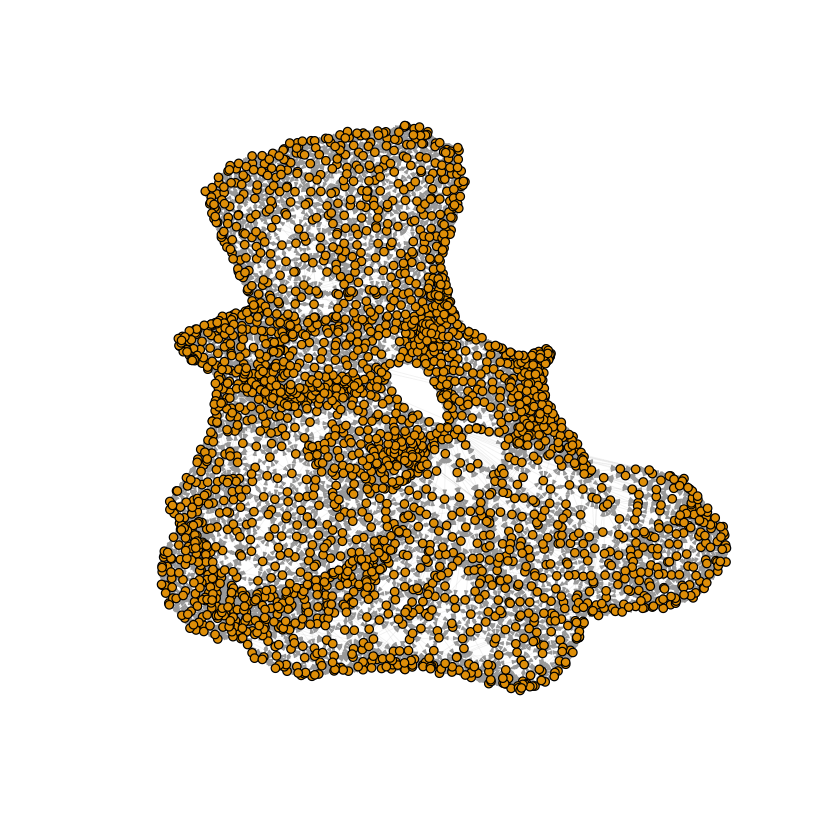

In [35]:
plot(g, vertex.size=3, vertex.label=NA, edge.arrow.size=0.2, edge.width=0.05)